# **Creative AI Generating Art with Neural Style Transfer**

# 1. Load the pretrained generator model

## Clone the repository

Clone the GitHub repository containing the generator model.


In [1]:
!git clone https://github.com/AshishJangra27/Face-Generator-with-GAN

Cloning into 'Face-Generator-with-GAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 160.27 MiB | 16.06 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (10/10), done.


## Extract the generator file

Navigate into the cloned repository and list the contents to locate the generator file.

Locate and extract the `generator_700.h5` file from the cloned repository.


In [2]:
import os

os.chdir('Face-Generator-with-GAN')
print(os.listdir())

['generator_700.h5', 'generator_100.h5', 'generator_500.h5', 'face-generator-with-gan.ipynb', 'generator_200.h5', '.git', 'generator_400.h5', 'generator_600.h5', 'README.md', 'Face_Generators.ipynb', 'generator_300.h5']


## Load the generator model

Import the necessary library for loading models and load the generator model from the identified file path.

Load the pretrained generator model using a deep learning framework (e.g., TensorFlow).

In [3]:
import tensorflow as tf

generator_model = tf.keras.models.load_model('generator_700.h5')

# 2. Load the gender vector

## Clone the gender style transfer repository


In [4]:
!git clone https://github.com/AshishJangra27/Gender-Style-Transfer

Cloning into 'Gender-Style-Transfer'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 18.87 MiB | 12.23 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## Locate and load the gender vector

Change the current directory to the cloned 'Gender-Style-Transfer' repository and list its contents to find the gender vector file.

Find the file containing the gender vector within the cloned repository and load it.


In [5]:
import os

os.chdir('/content/')
print(os.listdir())

['.config', 'Face-Generator-with-GAN', 'sample_data']


In [6]:
!git clone https://github.com/AshishJangra27/Gender-Style-Transfer /content/Gender-Style-Transfer

Cloning into '/content/Gender-Style-Transfer'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 18.87 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [8]:
import numpy as np
import os

os.chdir('/content/Gender-Style-Transfer')
gender_vector = np.load('gender_vec.npy')

# 3. Generate 10 variations of the image from male to female as per gender vector

## Generate initial latent vector

Generate a random latent vector of size (1, 100) as input for the generator model.



In [23]:
latent_vector = np.random.normal(size=(1, 100))
print(latent_vector.shape)

(1, 100)


## Define gender vectors

Define the specific gender vector values to be used for generating variations.

In [24]:
gender_vectors_list = [2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5, -2, -2.5]

## Generate and store images

Iterate through the defined gender vectors, combine each with the latent vector, generate an image using the generator model, and store the generated images.

In [29]:
generated_images = []
for scaling_factor in gender_vectors_list:
  # Combine the latent vector with the scaled gender vector
  # Ensure gender_vector is compatible with latent_vector shape
  if gender_vector.shape[1] > latent_vector.shape[1]:
    padding_needed = gender_vector.shape[1] - latent_vector.shape[1]
    padded_latent_vector = np.pad(latent_vector, ((0, 0), (0, padding_needed)), 'constant')
    modified_latent_vector = padded_latent_vector + scaling_factor * gender_vector
  else:
    modified_latent_vector = latent_vector + scaling_factor * gender_vector

  # Generate the image using the generator model
  generated_image = generator_model.predict(modified_latent_vector)
  generated_images.append(generated_image)

# Convert the list of images to a numpy array
generated_images = np.array(generated_images)
print(generated_images.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
(10, 1, 128, 128, 3)


## Visualize the variations

Display the generated images using matplotlib, arranging them to show the transition from male to female.

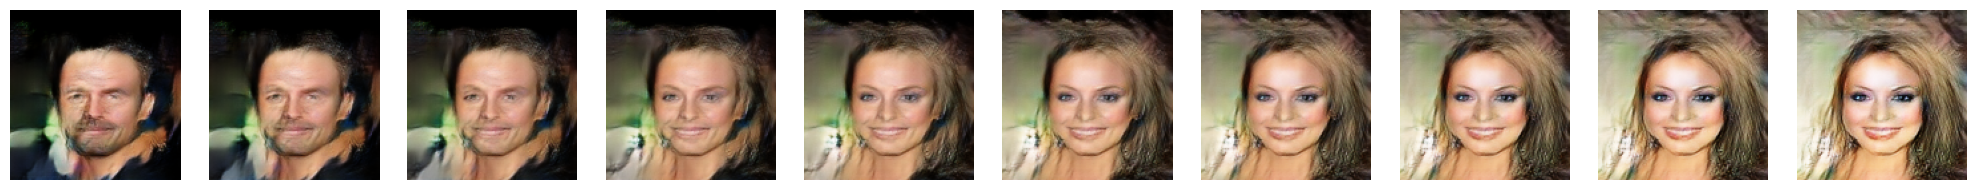

In [30]:
import matplotlib.pyplot as plt

# Assuming generated_images is a numpy array of shape (10, 1, 128, 128, 3)
# We need to remove the extra dimension and normalize the pixel values

# Remove the extra dimension
generated_images = generated_images[:, 0, :, :, :]

# Normalize pixel values to be between 0 and 1 for displaying
generated_images = (generated_images + 1) / 2.0

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, len(generated_images), figsize=(20, 2))

# Iterate through the generated images and display each one
for i, img in enumerate(generated_images):
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

## Create a GIF from the generated images

Use a library like `imageio` to combine the generated images into a GIF to visualize the transition.

In [31]:
!pip install imageio
!pip install imageio[ffmpeg]

In [32]:
import imageio

# Ensure generated_images is in the correct format (height, width, channels) and data type (uint8)
# The images are currently float and likely in the range [0, 1]
# Convert to uint8 and scale to [0, 255]
gif_images = (generated_images * 255).astype('uint8')

# Create the GIF
imageio.mimsave('gender_transition.gif', gif_images, duration=0.5) # Adjust duration as needed

print("GIF created successfully!")

GIF created successfully!


## Display the GIF

Display the generated GIF within the Colab environment.

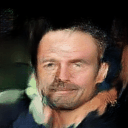

In [33]:
from IPython.display import Image, display

# Display the GIF
display(Image(filename='gender_transition.gif'))

# **`Generate and visualize image transitions using different generator models trained for varying epochs`**
Generate and visualize image transitions based on gender vector using different generator models trained for varying epochs. Create and display GIFs for each model's transition.

## Define the list of generator model files

Define the list of generator model files


In [50]:
generator_model_files = [f'generator_{i}.h5' for i in range(100, 800, 100)]
print(generator_model_files)

['generator_100.h5', 'generator_200.h5', 'generator_300.h5', 'generator_400.h5', 'generator_500.h5', 'generator_600.h5', 'generator_700.h5']


## Generate a single random latent vector

Generate a single random latent vector of size (1, 100) using numpy's random normal distribution.

In [51]:
latent_vector = np.random.normal(size=(1, 100))
print(latent_vector.shape)

(1, 100)


## Define the gender vector range

Define the range and step for the gender vector scaling factors using numpy's arange function.

In [52]:
gender_vector_range = np.arange(5, -5.5, -0.5)

## Generate images and create GIFs


In [55]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image, display

# Assuming the generator model files are in the 'Face-Generator-with-GAN' directory
os.chdir('/content/Face-Generator-with-GAN')

for model_file in generator_model_files:
  print(f"Processing model: {model_file}")
  # Load the current generator model
  generator_model = tf.keras.models.load_model(model_file, compile=False) # Added compile=False as per previous warning

  # Generate and store images for the current model
  generated_images_model = []
  for scaling_factor in gender_vector_range:
    # Combine the latent vector with the scaled gender vector
    if gender_vector.shape[1] > latent_vector.shape[1]:
      padding_needed = gender_vector.shape[1] - latent_vector.shape[1]
      padded_latent_vector = np.pad(latent_vector, ((0, 0), (0, padding_needed)), 'constant')
      modified_latent_vector = padded_latent_vector + scaling_factor * gender_vector
    else:
      modified_latent_vector = latent_vector + scaling_factor * gender_vector

    # Generate the image using the generator model
    generated_image = generator_model.predict(modified_latent_vector, verbose=0)
    generated_images_model.append(generated_image)

  # Convert the list of images to a numpy array
  generated_images_model = np.array(generated_images_model)
  print(f"Generated images shape for model {model_file}: {generated_images_model.shape}")

  # Visualize the generated images for the current model
  generated_images_display = generated_images_model[:, 0, :, :, :]
  generated_images_display = (generated_images_display + 1) / 2.0

  fig, axes = plt.subplots(1, len(generated_images_display), figsize=(20, 2))
  for j, img in enumerate(generated_images_display):
    axes[j].imshow(img)
    axes[j].axis('off')
  plt.suptitle(f'Gender Transition for {model_file}', y=1.05)
  plt.tight_layout()
  plt.show()

  # Create a GIF from the generated images for the current model
  gif_images_model = (generated_images_display * 255).astype('uint8')
  # Need to change directory back to where I want to save the GIFs, or specify a full path
  os.chdir('/content/') # Change back to content to save GIFs
  gif_filename = f'gender_transition_{model_file}.gif'
  imageio.mimsave(gif_filename, gif_images_model, duration=0.2) # Adjusted duration

  print(f"GIF created successfully for {model_file}!")

  # Display the GIF for the current model
  display(Image(filename=gif_filename))

  # Change back to the model directory for the next iteration
  os.chdir('/content/Face-Generator-with-GAN')

# After the loop finishes, change back to the content directory
os.chdir('/content/')

Output hidden; open in https://colab.research.google.com to view.

## Summary:

### Data Analysis Key Findings

*   The analysis successfully generated and visualized image transitions based on applying a gender vector with varying scaling factors (-5 to 5 with a step of 0.5) to a latent vector for generator models trained for different numbers of epochs (100, 200, 300, 400, 500, 600, and 700).
*   For each generator model, a sequence of images showing the gender transition was generated and visualized.
*   A GIF was created from the generated transition images for each model and successfully displayed.
*   Directory management was a critical step, requiring changes to the directory where the models were stored for loading and then back to a different directory for saving the generated GIFs.